In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

from load_data import *
from models import *

import matplotlib.pyplot as plt
import numpy as np

In [2]:
trainset, trainloader, testset, testloader, classes = get_miniplaces_data()

TypeError: get_miniplaces_data() missing 1 required positional argument: 'batch_size'

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalized data
    """
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [4]:
dataiter = iter(testloader)

test/00000001.jpg


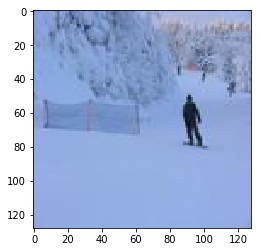

In [5]:
image_path, input_tensor = dataiter.next()

img = plt.imread('../miniplaces/images/' + image_path[0])
plt.imshow(img)
print(image_path[0])

In [27]:
model = AdaHAN(hidden_size=8, n_classes=len(classes), k=2, adaptive=False)
model.load_state_dict(torch.load('./miniplaces_AdaHAN.pth'))

In [28]:
class_preds, latent_mask = model(input_tensor)

_, predicted = torch.max(class_preds, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

Predicted:  /s/ski_slope


Number of latent spatial locations selected for attention: 2.0.
Percentage of input image pixels attended to: 16.6%.



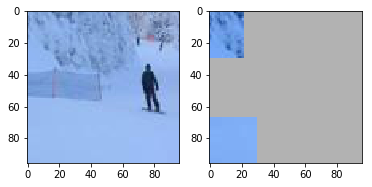

In [29]:
visualizer = AttentionVisualizer()

attended_tensor = visualizer(input_tensor, latent_mask)
attended_np = normalize(attended_tensor.squeeze(dim=0).permute(1, 2, 0).detach().numpy())
image_np = normalize(input_tensor.squeeze(dim=0).permute(1, 2, 0).detach().numpy())

fig, (ax_orig, ax_attn) = plt.subplots(ncols=2)
ax_orig.imshow(image_np)
ax_attn.imshow(attended_np)